In [3]:
from msedge.selenium_tools import EdgeOptions
from msedge.selenium_tools import Edge
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import numpy as np

edge_options = EdgeOptions()
edge_options.use_chromium = True
edge_options.add_argument('headless')
edge_options.add_argument('disable-gpu')

driver = Edge(executable_path = r'C:\Program Files (x86)\msedgedriver.exe', options = edge_options)
wait = WebDriverWait(driver,10)

attable = pd.DataFrame(columns = ['Date', 'Venue', 'Competition', 'Score', 'Spurs Scorers', 'Arsenal Scorers', 'Attendance'])

def stats():
    global attable
    driver.get('http://www.mehstg.com/arsestat.htm')
    for r in range(2, 266):
        m = []
        for p in range(1, 8):
            try:
                try:
                    test2 =  driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font/br').text
                    if "aet" in test2: 
                        value4 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[1]/font').text + ' - ' + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font/text()[1]').text
                        m.append(value4)
                        continue
                except:
                    try:
                        test3 =  driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b/font/br').text
                        if test3 != None: 
                            value8 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b/font/text()[1]').text()
                            l = value8.split('"\"')[0]
                            m.append(value8)
                            continue
                    except:
                        test3 = 1
                try:
                    value = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/font/b').text
                    if (value == "-" or value == " -") and p == 4: 
                        value1 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[1]/font').text + ' - ' + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font').text 
                        m.append(value1) 
                    elif "&nbsp" in value:
                        if value[0].isdigit():
                            t2 = value[0] + " - " + value[-1]
                            m.append(t2)
                    elif value.startswith(" -"):
                        value3 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b/font').text + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/font/b').text
                        m.append(value3)
                    elif value == "&nbsp;-&nbsp;":
                        t1 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font').text
                        if "(a.e.t.)" in t1:
                            value3 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[1]/font').text + ' - ' + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font').text
                            value5 = value3.split("(")[0]
                            m.append(value5)
                            continue
                        value1 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[1]/font').text + ' - ' + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b[2]/font').text 
                        m.append(value1) 
                    elif value.endswith("-"):
                        value6 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/font/b').text + " " + driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b/font').text 
                        m.append(value6)
                    elif "A" == value[0]:
                        m.append("A")
                    elif "H" == value[0]:
                        m.append("H")
                    elif "Wembley" == value or "Stamford Bridge" == value or "Park Royal" == value or "Old Trafford" == value:
                        m.append("H")
                    elif value != None:
                        m.append(value)
                except:
                    value2 = driver.find_element_by_xpath('/html/body/div[1]/center/table/tbody/tr[' + str(r) + ']/td[' + str(p) + ']/b/font').text
                    if "Covid" in value2:
                        continue
                    if value2 == "??":
                        m.append("None")
                    elif "A" == value2[0]:
                        m.append("A")
                    elif "H" == value2[0]:
                        m.append("H")
                    elif "Wembley" == value2 or "Stamford Bridge" == value2 or "Park Royal" == value2:
                        m.append("H")
                    else:
                        m.append(value2)
            except:
                m.append("None")
                #/html/body/div[1]/center/table/tbody/tr[35]/td[4]/b[2]/font/br


        lo = pd.Series(m, index = attable.columns)
        attable = attable.append(lo, ignore_index = True)

stats()
print(attable)




        
        
    


e:\DataScience\DSvenv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Selenium Tools for Microsoft Edge is deprecated. Please upgrade to Selenium 4 which has built-in support for Microsoft Edge (Chromium): https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium/#upgrading-from-selenium-3
  if sys.path[0] == '':


           Date Venue     Competition  Score  \
0    12.07.2020     H  Premier League  2 - 1   
1        .09.20     A  Premier League  2 - 2   
2    10.02.2018     H  Premier League  1 - 1   
3      19.12.20     A   League Cup QF  2 - 0   
4        .12.20     A  Premier League  2 - 4   
..          ...   ...             ...    ...   
259  29.04.1899     H   United League  3 - 2   
260  11.03.1899     A   United League  1 - 2   
261  08.04.1898     H   United League  0 - 0   
262  25.12.1897     A   United League  3 - 2   
263  25.02.1897     H   United League  2 - 2   

                          Spurs Scorers  \
0     Son 18m 31s, Alderweireld 80m 51s   
1    Eriksen 09m 54s, Kane (p)  39m 11s   
2                      Kane (p) 73m 56s   
3             Son 19m 59s, Dele 58m 48s   
4       Dier 29m 46s, Kane (p)  33m 41s   
..                                  ...   
259            Joyce, Smith, Ord (o.g.)   
260                               Meade   
261                                 

In [4]:
#Questions to be answered:
#To what extent does location and attendance impact score?
#Is "homefield advantage" an accurate statement?


attable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             264 non-null    object
 1   Venue            264 non-null    object
 2   Competition      264 non-null    object
 3   Score            264 non-null    object
 4   Spurs Scorers    264 non-null    object
 5   Arsenal Scorers  264 non-null    object
 6   Attendance       264 non-null    object
dtypes: object(7)
memory usage: 14.6+ KB


In [5]:

attable.drop(columns = ['Date','Competition','Arsenal Scorers', 'Spurs Scorers'], inplace = True)

In [6]:
attable['Location'] = np.where(attable['Venue'].str.contains('H'), 100, 90)
print(attable)


    Venue  Score Attendance  Location
0       H  2 - 1      0,000       100
1       A  2 - 2     60,333        90
2       H  1 - 1     81,332       100
3       A  2 - 0     59,016        90
4       A  2 - 4     59,973        90
..    ...    ...        ...       ...
259     H  3 - 2      5,000       100
260     A  1 - 2      6,000        90
261     H  0 - 0     15,000       100
262     A  3 - 2      5,000        90
263     H  2 - 2      2,000       100

[264 rows x 4 columns]


In [7]:
attable['Spurs Score'] = attable['Score'].str[0]
attable['Arsenal Score'] = attable['Score'].str[4]

In [8]:
attable.drop(columns = ['Venue', 'Score'], inplace = True)
attable

,Attendance,Location,Spurs Score,Arsenal Score
0,"0,000",100,2,1
1,"60,333",90,2,2
2,"81,332",100,1,1
3,"59,016",90,2,0
4,"59,973",90,2,4
...,...,...,...,...
259,"5,000",100,3,2
260,"6,000",90,1,2
261,"15,000",100,0,0
262,"5,000",90,3,2


In [9]:
attable.drop(labels = [0, 23,26,28,30,31,32,34,35,36, 109, 116, 129, 137,139,142, 187,188,189, 192, 248], axis= 0, inplace = True)
pd.options.display.max_rows
pd.set_option('display.max_rows', None, 'display.max_columns', None)
attable['Spurs Score'] = attable['Spurs Score'].astype(str).astype(int)
attable['Arsenal Score'] = attable['Arsenal Score'].astype(str).astype(int)
attable.info()
attable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 1 to 263
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Attendance     243 non-null    object
 1   Location       243 non-null    int32 
 2   Spurs Score    243 non-null    int32 
 3   Arsenal Score  243 non-null    int32 
dtypes: int32(3), object(1)
memory usage: 6.6+ KB


,Attendance,Location,Spurs Score,Arsenal Score
1,"60,333",90,2,2
2,"81,332",100,1,1
3,"59,016",90,2,0
4,"59,973",90,2,4
5,"83,222",100,1,0
6,"59,530",90,0,2
7,"31,811",100,2,0
8,"60,039",90,1,1
9,"35,762",100,2,2
10,"60,060",90,1,1


In [10]:
conditions = [attable['Spurs Score'] > attable['Arsenal Score'], attable['Spurs Score'] < attable['Arsenal Score'], attable['Spurs Score'] == attable['Arsenal Score']]
choices = [int(0),int(1),int(2)]
#0 means that the Spurs won
#1 means that Arsenal Won
#2 means that they tied
attable['Winner'] = np.select(conditions, choices, default=np.nan)
attable['Attendance'] = attable['Attendance'].str.replace(',','')
attable['Attendance'] = attable['Attendance'].astype(float)
print(attable)

     Attendance  Location  Spurs Score  Arsenal Score  Winner
1       60333.0        90            2              2     2.0
2       81332.0       100            1              1     2.0
3       59016.0        90            2              0     0.0
4       59973.0        90            2              4     1.0
5       83222.0       100            1              0     0.0
6       59530.0        90            0              2     1.0
7       31811.0       100            2              0     0.0
8       60039.0        90            1              1     2.0
9       35762.0       100            2              2     2.0
10      60060.0        90            1              1     2.0
11      35678.0       100            1              2     1.0
12      35659.0       100            2              1     0.0
13      59900.0        90            1              1     2.0
14      35711.0       100            0              1     1.0
15      59476.0        90            0              2     1.0
16      

In [11]:
attable.describe()
#Taking a close look at the means for scores and attendance. 
# 37K attendance / 1.403292	Avg Spurs Score / 1.497942 Avg Arsenal Score 
# Not acknowledging win average due to the tie value of (2) throwing it off


,Attendance,Location,Spurs Score,Arsenal Score,Winner
count,243.000000,243.000000,243.000000,243.000000,243.000000
mean,37868.090535,95.226337,1.403292,1.497942,0.909465
std,19786.143283,5.005184,1.213691,1.305976,0.771411
min,500.000000,90.000000,0.000000,0.000000,0.000000
25%,22053.500000,90.000000,0.500000,1.000000,0.000000
50%,38377.000000,100.000000,1.000000,1.000000,1.000000
75%,53969.500000,100.000000,2.000000,2.000000,2.000000
max,83222.000000,100.000000,5.000000,6.000000,2.000000


In [12]:
attable['Winner'].value_counts()
#Arsenal won 97 times / Spurs won 84 times / they tied 62 times

1.0    97
0.0    84
2.0    62
Name: Winner, dtype: int64

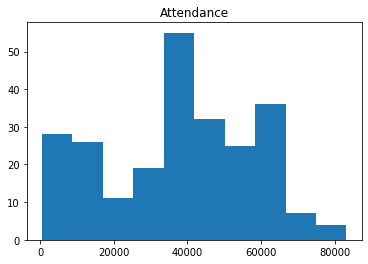

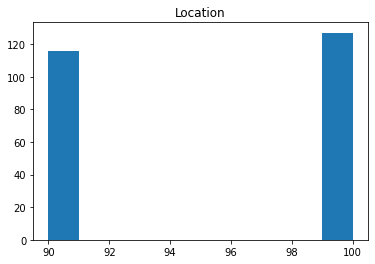

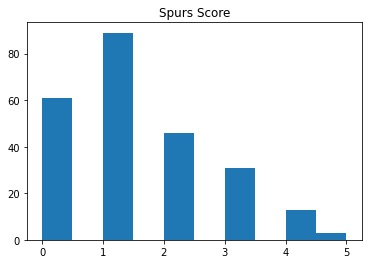

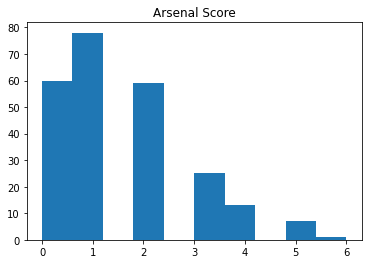

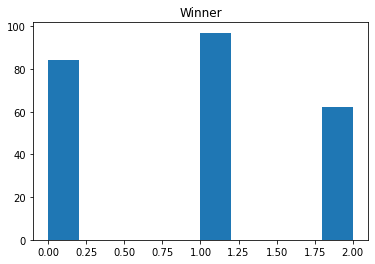

In [13]:
import matplotlib.pyplot as plt
for i in attable.columns:
    plt.hist(attable[i])
    plt.title(i)
    plt.show()

#we can see that attendance has some what of a health bell curve shape (disregarding influx of lower attendance)
#It is interesting to see that the wins/losses/ties are not far apart by any means. 
#Spurs have won around 20 less than Arsenal (THAT'S BECAUSE ARSENAL IS BETTER) however, they've tied quite a bit.
#There is an similar amount of away vs home games  

In [14]:
attable.info()
attable.sort_values('Attendance',axis=0,ascending = True, inplace= True,kind='stable')
print(attable)
#Let us also create 2 additional tables that highlight only home games and only away games
htable = attable[attable['Location'] == 100]
awtable = attable[attable['Location'] == 90]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 1 to 263
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Attendance     243 non-null    float64
 1   Location       243 non-null    int32  
 2   Spurs Score    243 non-null    int32  
 3   Arsenal Score  243 non-null    int32  
 4   Winner         243 non-null    float64
dtypes: float64(2), int32(3)
memory usage: 8.5 KB
     Attendance  Location  Spurs Score  Arsenal Score  Winner
257       500.0        90            1              2     1.0
179      1916.0        90            1              1     2.0
176      2000.0       100            3              3     2.0
253      2000.0       100            2              1     0.0
263      2000.0       100            2              2     2.0
254      3000.0        90            0              0     2.0
252      4000.0        90            1              2     1.0
255      4000.0       100            5    

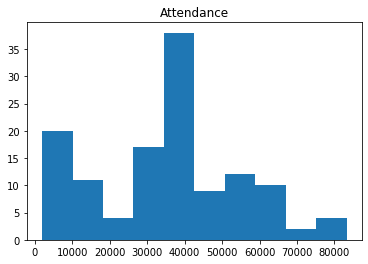

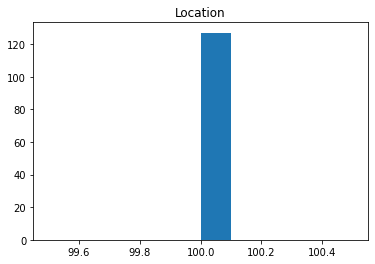

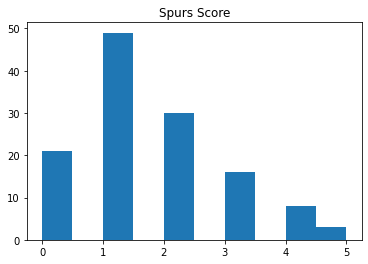

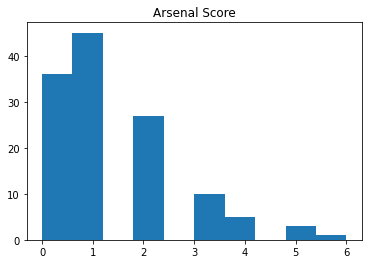

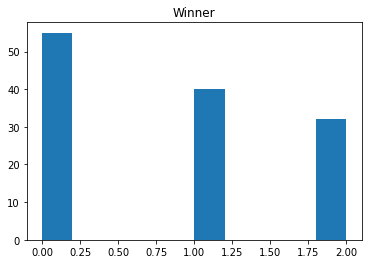

,Attendance,Location,Spurs Score,Arsenal Score,Winner
count,127.000000,127.0,127.000000,127.000000,127.000000
mean,35484.881890,100.0,1.606299,1.338583,0.818898
std,19406.826754,0.0,1.222523,1.280008,0.810813
min,2000.000000,100.0,0.000000,0.000000,0.000000
25%,20775.500000,100.0,1.000000,0.000000,0.000000
50%,36095.000000,100.0,1.000000,1.000000,1.000000
75%,47312.000000,100.0,2.000000,2.000000,1.500000
max,83222.000000,100.0,5.000000,6.000000,2.000000


In [15]:
for i in htable.columns:
    plt.hist(htable[i])
    plt.title(i)
    plt.show()
htable.describe()
# 35K attendance / 1.606299 Avg Spurs Score / 1.338583 Avg Arsenal Score
# We see with home games that the attendance lowered from 37K to 35K
# We see the Spurs, on average, scored higher at home games than overall (EXPECTED)
# We see Arsenal, on average, scored lower at away games than overall (EXPECTED)

# To what extent for home games? 1.606299 - 1.403292 & 1.338583 - 1.497942 

# +0.203 more goals scored for / -0.159 less goals scored against

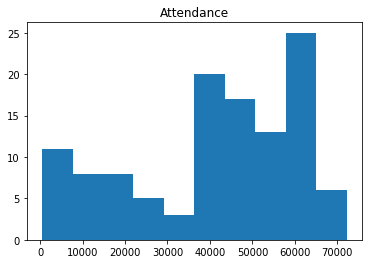

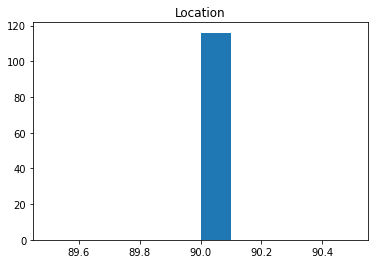

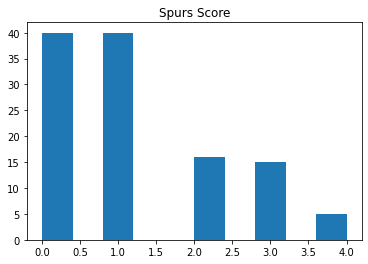

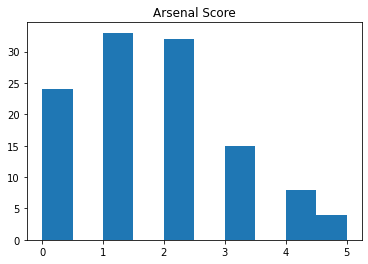

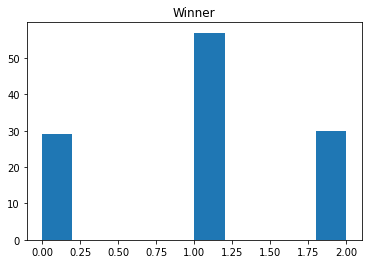

,Attendance,Location,Spurs Score,Arsenal Score,Winner
count,116.000000,116.0,116.000000,116.000000,116.000000
mean,40477.293103,90.0,1.181034,1.672414,1.008621
std,19951.060485,0.0,1.169163,1.317282,0.716218
min,500.000000,90.0,0.000000,0.000000,0.000000
25%,23964.000000,90.0,0.000000,1.000000,0.750000
50%,44631.500000,90.0,1.000000,2.000000,1.000000
75%,59206.000000,90.0,2.000000,2.000000,2.000000
max,72164.000000,90.0,4.000000,5.000000,2.000000


In [16]:
for i in awtable.columns:
    plt.hist(awtable[i])
    plt.title(i)
    plt.show()
awtable.describe()

# 40.5K Attendance / Avg Spur Score 1.181034 / Avg Arsenal Score 1.672414 
# So attendance immediately went up to 40.5K and it didn't even dawn on me that one outlying factor that dictates this is the size of the stadium. 
# It's a theory that this is the primary contributer however, it is worth mentioning
# We see the Arsenal, on average, scored higher at home games than overall (EXPECTED)
# We see Spurs, on average, scored lower at away games than overall (EXPECTED)

# To what extent for away games? 1.181034 - 1.403292 & 1.672414 - 1.497942 

# -0.2223 less goals scored for / +0.1745 more goals scored against

               Attendance  Location  Spurs Score  Arsenal Score    Winner
Attendance       1.000000 -0.126290    -0.045165       0.131523  0.065409
Location        -0.126290  1.000000     0.175376      -0.127942 -0.123099
Spurs Score     -0.045165  0.175376     1.000000       0.021382 -0.424266
Arsenal Score    0.131523 -0.127942     0.021382       1.000000  0.221306
Winner           0.065409 -0.123099    -0.424266       0.221306  1.000000


<AxesSubplot:>

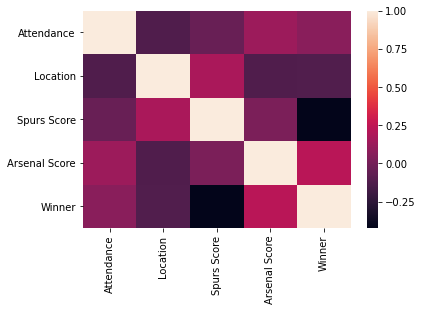

In [17]:
import seaborn as sns
print(attable.corr())
sns.heatmap(attable.corr())
#Using the seaborn heatmap we actually can see the EXTENT of a correlation between attendance and winning being -0.1231 which is not serious relationship however,
#it gives a good idea with relation to others that it has an impact. 
#Also, check out the relationship between attendance and location (-0.12629). Only further supports my suspisions. Stadium size matters.

In [18]:
#Building a series of ML models to perform predictave analysis on the likliness of Arsenal or Spurs winning when given a set of paramaters.
#These ML Models will highlight over the relationship between attendance and location with the outcome of the games.
#It is evident the model will not give a tell-all like prediction however, it would be beneficial to see the extent of how accurate it would be.
#I have to remove the score because the model will just directly correlate the score with the win so it doesnt make sense to make a model haha
dtable = attable.copy()
dtable.drop(columns = {"Spurs Score", "Arsenal Score"}, inplace = True)
X = dtable.iloc[:, :-1].values
Y = dtable.iloc[:, -1].values
print(X)
print(Y)

[[  500.    90.]
 [ 1916.    90.]
 [ 2000.   100.]
 [ 2000.   100.]
 [ 2000.   100.]
 [ 3000.    90.]
 [ 4000.    90.]
 [ 4000.   100.]
 [ 4000.    90.]
 [ 4000.   100.]
 [ 4455.    90.]
 [ 4568.   100.]
 [ 5000.   100.]
 [ 5000.   100.]
 [ 5000.   100.]
 [ 5000.   100.]
 [ 5000.    90.]
 [ 6000.    90.]
 [ 6000.    90.]
 [ 6000.   100.]
 [ 6000.    90.]
 [ 6673.    90.]
 [ 7000.   100.]
 [ 7000.   100.]
 [ 7000.   100.]
 [ 7800.   100.]
 [ 8000.    90.]
 [ 8000.   100.]
 [ 9000.   100.]
 [ 9028.   100.]
 [ 9054.   100.]
 [10000.    90.]
 [10000.    90.]
 [10000.   100.]
 [10160.   100.]
 [11000.    90.]
 [11000.   100.]
 [12000.    90.]
 [12000.   100.]
 [12000.    90.]
 [13000.    90.]
 [13500.   100.]
 [13518.    90.]
 [13624.   100.]
 [14500.   100.]
 [14879.    90.]
 [15000.   100.]
 [15000.    90.]
 [15000.    90.]
 [15000.   100.]
 [16000.    90.]
 [16000.   100.]
 [16000.    90.]
 [16777.   100.]
 [17436.   100.]
 [17446.    90.]
 [18000.    90.]
 [19900.    90.]
 [20000.   100

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)
print(Y_test)

[1. 0. 2. 0. 1. 0. 2. 0. 1. 2. 2. 0. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 2. 0. 2. 0. 1. 1. 2. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.]


In [20]:
#Normalizing continuous variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 2.28806084  0.96755889]
 [ 0.60305957 -1.03352882]
 [-0.27025943  0.96755889]
 [-1.21535591 -1.03352882]
 [ 0.98243969  0.96755889]
 [-1.32098869 -1.03352882]
 [ 0.67879827 -1.03352882]
 [ 0.54696856 -1.03352882]
 [ 0.49758524 -1.03352882]
 [-0.10108854  0.96755889]
 [ 0.68603412 -1.03352882]
 [ 1.12816011  0.96755889]
 [-0.10293711  0.96755889]
 [-0.86935574  0.96755889]
 [-0.09723294  0.96755889]
 [ 0.30322092 -1.03352882]
 [ 1.3111689  -1.03352882]
 [-0.12369395 -1.03352882]
 [-1.7435198   0.96755889]
 [ 1.22006063 -1.03352882]
 [-1.65515798 -1.03352882]
 [-1.05690674 -1.03352882]
 [ 1.16513159 -1.03352882]
 [-1.08616702 -1.03352882]
 [ 0.00634    -1.03352882]
 [-0.22721408  0.96755889]
 [-1.12150118  0.96755889]
 [ 0.10552918 -1.03352882]
 [ 0.68756579  0.96755889]
 [ 1.40196028  0.96755889]
 [ 0.01410401 -1.03352882]
 [-1.2936298  -1.03352882]
 [-1.69070341 -1.03352882]
 [-1.84915258 -1.03352882]
 [ 0.84247626  0.96755889]
 [ 0.71228386 -1.03352882]
 [-1.21535591 -1.03352882]
 

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np


#Let's implement a GridSearchCV to find optimal parameter for each of the 3 tests.
#This will offer us with the ability to see which tests are worthwhile to perform.

svc = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()

lrparam_grid = {'max_iter': [2000],
              'penalty': ['l2'],
              'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}

knnparam_grid = {'n_neighbors' : [78,80,82,84], #had to mess around with numbers to see what was suggested. Eventually landed on 80
                 'weights' : ['uniform', 'distance'],
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree']}
                 
svcparam_grid = {'C': [0.1, 1, 10, 100],
                 'gamma': [1,0.1,0.01, 0.001],
                 'kernel': ['rbf','poly','sigmoid']}


optlr = GridSearchCV(lr, param_grid = lrparam_grid, cv = 5, verbose = True, n_jobs = -1 )
optknn = GridSearchCV(knn, param_grid= knnparam_grid, cv = 5, verbose = True, n_jobs = -1)
optsvm = GridSearchCV(svc, param_grid= svcparam_grid, refit = True, verbose = 2)
lrp = optlr.fit(X_train, Y_train)
knnp = optknn.fit(X_train, Y_train)
svmp = optsvm.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV]

In [71]:
print("Best Logist Regression Score is: ", lrp.best_score_,"\r\n",
"Best Parameters for Logist Regression is: ", lrp.best_params_,"\r\n",
"Best KNN Score is: ", knnp.best_score_,"\r\n",
"Best Parameters for KNN is: ", knnp.best_params_,"\r\n",
"Best SVM Score is: ", svmp.best_score_,"\r\n",
"Best Parameters for SVM is: ", svmp.best_params_)

#It appears that KNN yields the best results of the 3 tests. It took quite a bit of time to narrow down on 80 neighbors haha
#I am a bit dissapointed that the best scores are this low. Ideally, I was looking for 60 - 70%.

Best Logist Regression Score is:  0.4671171171171172 
 Best Parameters for Logist Regression is:  {'C': 0.0001, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'} 
 Best KNN Score is:  0.47822822822822825 
 Best Parameters for KNN is:  {'algorithm': 'auto', 'n_neighbors': 80, 'weights': 'uniform'} 
 Best SVM Score is:  0.46726726726726725 
 Best Parameters for SVM is:  {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [54]:
lr = LogisticRegression(max_iter= 2000, random_state= 0,penalty= "l2", C=0.0001, solver= 'liblinear')
lr.fit(X_train, Y_train)

LogisticRegression(C=0.0001, max_iter=2000, random_state=0, solver='liblinear')

In [55]:
print(lr.predict(sc.transform([[20000,100]])))
#It is predicted that the Spurs will win if a game that is played at home and the attendance is 20,000 

[0.]


In [56]:
print(lr.predict(sc.transform([[40000,100]])))
#It is predicted that the Spurs will win if a game that is played at home and the attendance is 40,000 

[0.]


In [57]:
print(lr.predict(sc.transform([[20000, 90]])))
#It is predicted that Arsenal will win if a game is played away and the attendance is 20,000

[1.]


In [58]:
print(lr.predict(sc.transform([[40000, 90]])))
#It is predicted that Arsenal will win if a game is played away and the attendance is 40,000

[1.]


In [59]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0. 1.]
 [1. 0.]
 [1. 2.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 2.]
 [1. 2.]
 [1. 0.]
 [1. 1.]
 [0. 2.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 2.]
 [0. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 2.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true = Y_test, y_pred = y_pred) 
lc = accuracy_score(y_true = Y_test, y_pred = y_pred)

print(cm)
print(lc)

#First trial was a basic model with a 25% test size and concluded with an accuracy score of 44.26% (just shy of best score being 46.7%)
# CM: 
#[[12 12  0] 12 correct predictions for if Arsenal won
#[ 12 15  0] 15 correct predictions if Tottenham won
#[ 5  5  0]] 
#So far, no surprises have been uncovered and I am concerned for overfitting since 25% of 263 records is around 65


[[12 12  0]
 [12 15  0]
 [ 5  5  0]]
0.4426229508196721


In [63]:
#2nd take: KNN
knn = KNeighborsClassifier( algorithm= 'auto', n_neighbors= 80, weights= 'uniform')
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=80)

In [68]:
knny_pred = knn.predict(X_test)
print(np.concatenate((knny_pred.reshape(len(knny_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0. 1.]
 [1. 0.]
 [1. 2.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 2.]
 [1. 2.]
 [1. 0.]
 [1. 1.]
 [0. 2.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 2.]
 [0. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 2.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]


In [66]:
cm = confusion_matrix(y_true = Y_test, y_pred = knny_pred) 
lc = accuracy_score(y_true = Y_test, y_pred = knny_pred)

print(cm)
print(lc)

#Got a bit lower of a score than the logistic regression with a 42.6% accuracy score and its best score being higher with a 47.8%
# CM: 
#[[12 12  0] 12 correct predictions for if Arsenal won
#[ 13 14  0] 14 correct predictions if Tottenham won
#[ 5  5  0]] 

#Really not too much of a difference. 
#It's as expected that the GridSearch would not overhaul the expected outcome however, it does optimize within reason.

[[12 12  0]
 [13 14  0]
 [ 5  5  0]]
0.4262295081967213


In [67]:
svm = SVC(C= 0.1, gamma= 1 , kernel= 'poly')
svm.fit(X_train, Y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [69]:
svmpred_y = svm.predict(X_test)
print(np.concatenate((svmpred_y.reshape(len(svmpred_y),1), Y_test.reshape(len(Y_test),1)),1))

[[0. 1.]
 [0. 0.]
 [1. 2.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 2.]
 [1. 2.]
 [1. 0.]
 [1. 1.]
 [0. 2.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 2.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 2.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 2.]
 [0. 0.]
 [0. 2.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 2.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]


In [70]:
cm = confusion_matrix(y_true = Y_test, y_pred = svmpred_y) 
lc = accuracy_score(y_true = Y_test, y_pred = svmpred_y)

print(cm)
print(lc)

#Lastly, SVM got the highest score with a 44.3% accuracy score and its best score being higher with a 47.8%
# CM: 
#[[14 10  0] 14 correct predictions for if Arsenal won
#[ 14 13  0] 13 correct predictions if Tottenham won
#[ 5  5  0]]

[[14 10  0]
 [14 13  0]
 [ 5  5  0]]
0.4426229508196721


In [ ]:
#In the end SVM yielded the highest accuracy score despite the best score provided by GridSearchCV! 
#Given the arbitrary nature of my webscraped data I am not surprised SVM shined given its ability to encompass a relatively linear set of data (as seen with the metrics description)
#I am aware I could have "refit" the data with the exact suggested paramater tuning GridSearchCV provided which could have potentially turned the tables in favor of KNN.
#Given the overall accuracy of all 3 models it seems there isn't too much of a patternistic behavior to the history of the North London Derby (Tottenham vs Arsenal)
#Ideally, logistic regressions should provide something between a 60 - 70% to be considered "decent results" for a random set of data.

#This project taught me many things from the true breakdown cycle of data from start to finish to understanding the nuances of parameter tuning with GridSearchCV
#I appreciate being able to see the use of simple histograms with analyzing data at a relatively basic level and spot insightful information on correlations with variables like location and attendance!
#More specific examples are: 
#Arsenal won 97 times / Spurs won 84 times / they tied 62 times
#Spur Home Games - +0.203 more goals scored for / -0.159 less goals scored against
#Spur Away Games - -0.2223 less goals scored for / +0.1745 more goals scored against

#There's actually a podcast I listened to that theorized it is (slightly) more difficult for a home team to win given they know the people in the stands.
#This set of data seemed to prove otherwise. 

#So to return to my previously asked questions:
#To what extent does location and attendance impact score?
#Based on the multiple predictions made with our logistic regression attendance does not effect it HOWEVER, location does by a relatively substantial amount.

#Is "homefield advantage" an accurate statement?
#Based on our data set "Homefield Advantage" IS an accurate statement!  

#Possible Errors:
#Flaws in my parameter tuning
#(I searched for this and couldn't find an answer) Not knowing if you normalize before or after gridsearch
#I am not sure if I was REQUIRED to use pipeline to avoid effecting other sets of data. I do not believe it did

#If I were to expand on this project I would calculate the Error Rate, F1, and recall for all 3. 
#Given the poor nature of the accuracy rate I didn't feel like I had enough self esteem at that point to torture myself with those numbers haha.

#I would also backtrack and create a new set for a randomforestclassifier and see if there's a possibility of predicting scores given a set of parameters.

#Hopefully, next time I can find a set of data with a bit more of a clustered nature or patternistic structure.

#With Tottenhams surprising ability to beat Man City this season it shows there really is no predictability in futbol HAHAHA